
# Galactic Astrophysics Notebook

## Part 1 Supernova Remnants

The lecture has given an introduction into the structure of supernova remnants and the three different phases they go through (which change as the time since the supernova explosion). In this python task we will esimate the increase in radius and velocity of the expanding shell in the Sedov-taylor phase of the supernova remnant. 

### Task 1.1

In this task you will plot the analytical solution for the Sedov-Taylor phase of the evolution of a supernova remnant. 

First load the modules you will need (numpy, math and matplotlib).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

To calculate these quantities correctly we need to make sure all values are using the same system of units. Here we are using cgs (centimetres, grams, seconds).
To input and output the values it makes more sense to have them in units more suited to astronomy, to make them easier to read.

Define some constants that can be multiplied by the output values so we can print them out in useful units.

For example, time will be calculated in seconds but it is more useful for us to output it in years, or Megayears (millions of years, 1 million = 1,000,000). 
So we can define:

$sectoyear = 60 \times 60 \times 24 \times 365.25$

Then multiply this by the output to ensure the time we are reading is printed in years. 

Lengths will be calculated in $cm$ - but we want them in $pc$.

Velocities will be calculated in $cm/s$ - but we want them in $km/s$.

Masses will be calculated in grams - but we want them in solar masses. 

In [2]:
#Convert seconds to years
sectoyear = 60 * 60 * 24 *365.25
#Convert centimetres to parsec
cmtopc = 3.086E18
#Convert centimetres to velocity
cmtokm = 1.0E5
#Convert solar masses to grams
sol2gram = 1.989E33

Now we need to define some constant values such as the explosion energy and ambient density of the surrounding *ISM (interstellar medium)*. 

Ambient density = 1.E-26   (units = $g /{cm}^3$)

Explosion energy = 1.E51 (units = $erg$)

(These are both in cgs units so they don't need to be converted. 1 erg is $gcm^{2}/s^{2}$)

We should also define the mass of the ejected stellar material. For a type II supnernova this would be above 8M$_{\odot}$, for a type Ia supernova it would be much lower as the white dwarf has already blown all of the external stellar material away. We could estimate it to be below 1M$_{\odot}$ in this case. 
Remember the mass will need to be converted into cgs!

In [24]:
#Ambient density (ISM) in cgs                                                                                                                                                                                                  
rho_ambient = 1.E-26
#Explosion energy in cgs
E_SN = 1.E51
# Ejected mass                                                                                                                                                                                 
M_ejecta = 0.25 * sol2gram

We are going to be calculating the radius and velocity of the expanding shell during the Sedov-Taylor (ST) phase of the evolution of the SNR. 
To get the initial values for the velocity and radius of the swept up shell for the ST phase, we can estimate the velocity at the end of the free expansion phase.

Work out the initial velocity of the ejected stellar material using the equation below, assuming the explosion energy is converted to kinetic energy. 

### $E_{SN}$ = $\frac{1}{2} M_{e}v_{e}^2$


In [25]:
v_ejecta = (2. * E_SN /	M_ejecta)**(1./2.)
print("Initial velocity of the ejected material", v_ejecta/cmtokm, "km/s")

Initial velocity of the ejected material 20055.227919872894 km/s


### Task 1.2

Next we can work out the shell radius (in parsec) at the end of the free expansion phase, then the time it has taken (in years) to reach that radius. Use the equations below and assume the velocity in the free expansion phase is constant.

$\rho_{0}$ is the ambient density of the surrounding interstellar medium.

### $R_{SW} = \left(\frac{3M_{e}}{4\pi\rho_{0}}\right)^{1/3}$

### $t_{SW} = \frac{R_{SW}}{v_{e}}$

In [26]:
R_SW = (3. * M_ejecta /(4. * np.pi * rho_ambient))**(1./3.)
t_SW = R_SW / v_ejecta
print("Radius at the end of the free expansion phase", R_SW/cmtopc, "pc")
print("Time at the end of the free expansion phase", t_SW/sectoyear, "years")

Radius at the end of the free expansion phase 7.392071162091476 pc
Time at the end of the free expansion phase 360.43793410547414 years


### Task 1.3

Now work out the radius and velocity of the expanding shell of gas as a function of time during the Sedov-Taylor phase (where the time starts at the end of the free expansion phase). 

### $R_{Sed}(t) = \left(\frac{25E_{SN}}{4\pi\rho_{0}}\right)^{1/5}t^{2/5}$

### $V_{Sed}(t) = \frac{2}{5}\left(\frac{25E_{SN}}{4\pi\rho_{0}}\right)^{1/5}t^{-3/5}$

Remember to use cgs units for the values in your calculations, then convert back to more sensible values (i.e. parsec,  years and km/s) afterwards. 

In [35]:
t_start = 360
t_end = 20000 #years                                                                                                                                                                                                           
blah=(10000 - t_start+1)

#Define arrays
R_sed =[]
V_sed =[]
t_sed =[]
#R_sed = np.zeros(blah)
#V_sed = np.zeros(blah)
#Time = np.zeros(blah)

#Loop over time                                                                                                                                                                                                                
for i in range(t_start, t_end, 10):
    Time = i * sectoyear
    t_sed.append(Time/sectoyear)
    
    Radius = ((25.  * E_SN)/(4. * np.pi * rho_ambient))**(1./5.) * (Time)**(2./5.)
    R_sed.append(Radius/cmtopc)
    
    Velocity = (2.0/5.0)*((25.0 * E_SN)/(4. * np.pi  * rho_ambient))**(1./5.) * Time**(-3./5.)
    V_sed.append(Velocity/cmtokm)

print("Values after expansion in the Sedov-Taylor phase after 20 000 years:")
print("Radius = ", R_sed[-1], "pc")
print("Velocity = ", V_sed[-1], "km/s")



Values after expansion in the Sedov-Taylor phase after 20 000 years:
Radius =  49.013623644185046 pc
Velocity =  959.0824930930435 km/s


Use the subplot function within matplotlib to create two plots showing the evolution of the shell radius with time and the shell velocity with time. 

Remember to add titles and axis labels. 

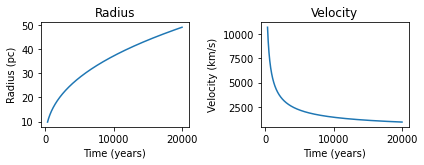

In [36]:
plt.subplot(2,2,1)
plt.plot(t_sed, R_sed)
plt.title('Radius')
plt.ylabel('Radius (pc)')
plt.xlabel('Time (years)')

plt.subplot(2,2,2)
plt.plot(t_sed, V_sed)
plt.title('Velocity')
plt.ylabel('Velocity (km/s)')
plt.xlabel('Time (years)')

plt.tight_layout()
plt.show()

## Part 2: Rotation Curves 

You have just been introduced to the idea of rotation curves of galaxies and the questions that arise from these measurements. This task will allow you to compare real observational data to theoretical models of what galaxies are made of. 

Tasks 2.1 and 2.2 were given in the pre-ThaiPASS homework. If you have completed the homework already, you can skip to task 2.3.

Stars move in orbits around the centre of mass of a galaxy due to the force of gravity. The magnitude of the orbital velocity depends on the enclosed mass (the mass inside the orbit) and the distance of the star from the centre of the galaxy (the radius). In this exercise we will explore the orbital velocity of stars in a galaxy and construct a rotation curve. 
There are two data files that you will need for these tasks, you can find them on the Github Page: https://github.com/Milne-Centre/ThaiPASS2024/




### Task 2.1

The file rc100224.dat contains the orbital velocities of stars in a galaxy and their radial distance from the centre of the galaxy. The first column of the file contains the radius (kpc: kiloparsec) and the second column contains observed orbital velocity (km/s: in kilometres per second). Read in the data from the file and plot the radial distance on the x-axis and the orbital velocity on the y-axis, this is the 'rotation curve' of the galaxy. 

You should use the data file *rc100224.dat*




In [11]:
rcdata = np.loadtxt('rc100224.dat',skiprows=1)

In [12]:
rcdata = np.array(rcdata)
radius = rcdata[:,0]
orbvel = rcdata[:,1]

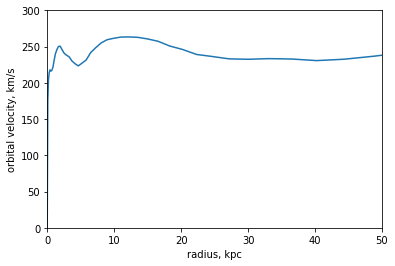

In [13]:
plt.plot(radius,orbvel)
#plt.xscale('log')
plt.ylim(0,300)
plt.xlim(0,50)
plt.ylabel('orbital velocity, km/s')
plt.xlabel('radius, kpc')
plt.show()

### Task 2.2

For this task you will use a real mass distribution data from a model of the Andromeda galaxy (M31) to calculate the orbital velocities. The mass distribution is of only baryonic matter (stars and gas). You will use the mass distribution to calculate and plot the rotation curve of the galaxy.

From the data file, remember that you need to use the cumulative/enclosed mass.

You can then use Kepler's Laws of Planetary Motion (see day one lecture slides) to calculate the orbital velocities of stars as a function of radial distance and plot this as a line graph.

You should then compare your graph to the one you made in task one and comment on any differences you find.

You should use the data file M31_mass2.dat
The first column of the file contains the radius (pc) and the second column contains the mass at that radius.



Now you will use real mass distribution data from a model of the Andromeda galaxy (M31) to calculate the orbital velocities of stars. The mass distribution is of only baryonic matter (stars and gas). You will use the mass distribution to calculate and plot the rotation curve of the galaxy.

You should use the data file M31_mass2.dat

The first column of the file contains the radius (pc: parsec) and the second column contains the total, enclosed, mass at that radius (and within it).Note that the units of radius are different here, there are 1000pc in 1kpc, ensure to use units of kpc in equation 1. 

You can then use the equation below, derived from Kepler's Laws of Planetary Motion to calculate the orbital velocities of stars as a function of radial distance and plot this as a line graph.
   
$ v = \sqrt{\frac{GM(r)}{r}} $ (Equation 1)


You can use the following value for the gravitational constant (if r in used in kpc, M is use din solar masses, v will be output in km/s):

$G=4.30091\times 10^{-6} \frac{pc (km/s)^{2}}{M_{\odot}^{-1}}$. 

 From the data file, remember that you need to use the cumulative/enclosed mass, $M(r)$, so add up the mass contained inside the sphere as the radius increases (hint: use a loop to do this). The mass for a star at a given radius should include the total mass within that radius.
    
You should then compare your graph to the one you made in the first task and comment on any differences you find.
    


In [20]:
def orbVel(r,mass):
    G=4.30091e-6
    vel = [0]
    for i in range(len(r)-1):
        tempv = np.sqrt(G*mass[i+1]/r[i+1])
        vel.append(tempv)
    return vel

In [21]:
M31data = np.loadtxt('M31_mass2.dat',skiprows=1)
M31data = np.array(M31data)
M31radius = M31data[:,0]/1000
M31mass = M31data[:,1]

M31vel = orbVel(M31radius, M31mass)

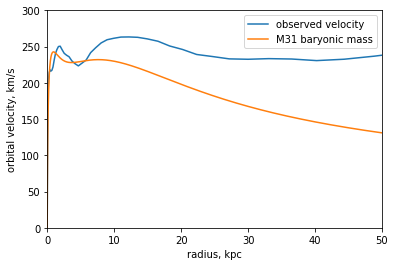

In [23]:
plt.plot(radius,orbvel, label="observed velocity")
plt.plot(M31radius,M31vel, label="M31 baryonic mass")

plt.ylim(0,300)
plt.xlim(0,50)
plt.ylabel('orbital velocity, km/s')
plt.xlabel('radius, kpc')
plt.legend()

### Task 2.3
We will now modify our model from task two and see how this affects the rotation curve. To modify our model we will add a *non-baryonic component* to the mass distribution in the form of a dark matter mass profile.

For this task, you will first define a *density profile*. You will have to calculate the mass distribution in part b from this density profile. This is done by first making a density profile using the radii values in the previous data files and then using a forward Euler solver function to get the mass function.

Then, add the dark matter mass to the mass distribution in task 2.2. After adding the mass, you should plot the rotation curve of the new mass distribution.

The density profile follows the NFW-profile (see lecture slides for more information).

For the constants, use: $\rho_c = 2.1 \times 10^3, r_c = 16.5 \times 10^3$
For initial conditions, use $\rho(r)\rvert_{r = 0} = \rho_c$

Hint: Use a loop in the function to loop of the values for the radius given in the last task, you will calculate the density and mass values at these values of radius. 

In [24]:
def rhoCal(r):
#     r = np.array(r)
    rhozero = 2.1e3
    scaleradius = 16.5e3
#     rhozero = 2.0e+7
#     scaleradius = 14.5e2
    rhoOut = [rhozero]
    for i in range(len(r)-1):
        temprho = rhozero / ((r[i+1]/scaleradius)*(1 + r[i+1]/scaleradius)**2)
        rhoOut.append(temprho)
    return rhoOut

### Task 2.4

This part of the task is to calculate the dark matter mass profile and add it to mass distribution in task two. After adding the mass, you should plot the rotation curve of the new mass distribution.

Recall that: 

$M(r)= \int 4  \pi r^2 \rho(r) dr$,  from which it follows that:

$M'(r) = \dfrac{dM(r)}{dr} = 4 \pi r^2 \rho(r)$,    which means $M_{n+1} = M_n + h \left( 4 \pi r_n^2 \rho_n  \right)$

And remember that you need to use the enclosed mass -- **not** the mass at point $r$.

For initial conditions, use $M(0) = 0$. Use $h = r_{n+1} - r_n$ and $r$ to be the M31 radius data.

In [26]:
def DM(r, rho):
    dmmass = [0]
    for i in range(len(r)-1):
        h = (r[i+1]-r[i])
        mTemp = 4*np.pi*r[i]**2*rho[i]*h
        mTemp2 = dmmass[i] + mTemp
        dmmass.append(mTemp2)
    return dmmass

dmRho = rhoCal(M31radius)
# testR = np.arange(0., 60*1e3,1.)
# dmRho = rho(testR)
print(max(dmRho))
dmMass = DM(M31radius, dmRho)
print(max(dmMass))

34649995800.000374
779941046075.6361


979797285156.9661


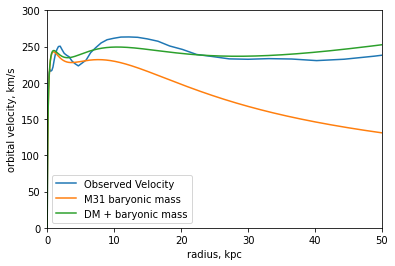

In [27]:
dmRho = rhoCal(M31radius)
dmMass = DM(M31radius, dmRho)
DMandBaryonic = np.array(dmMass) + np.array(M31mass)
print(max(DMandBaryonic))

DMvel = orbVel(M31radius,DMandBaryonic)

plt.plot(radius,orbvel, label="Observed Velocity")
plt.plot(M31radius,M31vel, label="M31 baryonic mass")
plt.plot(M31radius,DMvel, label="DM + baryonic mass")
# plt.plot(M31radius,M31vel)
plt.ylim(0,300)
plt.xlim(0,50)
plt.ylabel('orbital velocity, km/s')
plt.xlabel('radius, kpc')
plt.legend()
plt.savefig('obs_bary_DM.png')

### Additional information

If you want to do more plotting, more data of rotation curves is available at at http://www.ioa.s.u-tokyo.ac.jp/~sofue/smd2018/Atlas_data_S-galaxies/

You can press a number and find a list of data files. <code>rc[number].dat</code> are the rotation curves

'100000' is the Milky Way and '100224' is the Andromeda galaxy.

## Part 3: Rotation curves - advanced

### Task 3.1

This task is to construct the baryonic mass distribution yourself. This is based of the paper here: https://arxiv.org/pdf/1208.5712.pdf

Note that this is not following the paper strictly as there are some simplifications made


### Task 3.1

For simplification, we only assume a bulge, disc, and stellar halo. 
Using the following equation, calculate the density profiles for each component
$\rho(r) = \rho_c \text{ exp}\left(-d_N \left[\left(\dfrac{r}{a_c}\right)^{N-1}-1\right]\right)$,
where <br/>
name $=[\text{bulge, disc, stellar component}]$, <br/>
$\rho_c = [9.201e-1, 1.307e-2, 4.459e-4]$, <br/>
$a_c = [1.055, 9.0, 11.22]$, <br/>
$d_N[7.769, 3.273, 8.669]$, <br/>
$N=[2.7, 1.2, 3.0]$

For a detailed explanation of each parameter, look at the paper (equation 2)

In [28]:
def density(r, a_c, N, rho_c, d_N):
    rho = []
    a = r
    for i in a:
        tempRho = rho_c* math.exp(-d_N * ((i/(a_c*1e3))**(N**-1)-1))
        rho.append(tempRho)
    return rho

a = np.arange(0., 60.0e3, 1.)
a_c = [1.055, 9.0, 11.22]
N = [2.7, 1.2, 3.0]
rho_c = [9.201e-1, 1.307e-2, 4.459e-4]
d_N = [7.769, 3.273, 8.669]


rho = []
for i in range(len(a_c)):
    trho = density(a, a_c[i], N[i], rho_c[i], d_N[i])
    rho.append(trho)

### Task 3.2

In this task, you should calculate the mass in each interval. M(0) = 0

The approach is similar to what you did for the dark matter profile in the other notebook

In [29]:
def mass(r, rho):
    massOut = [0]
    for i in range(len(rho)-1):
        tempMass = 4*math.pi*r[i+1]**2*rho[i]*(r[i+1]-r[i])#*1e10
        massOut.append(massOut[i]+tempMass)
    return massOut

masses = []
for i in rho:
    masses.append(mass(a, i))

### Task 3.3

Now calculate the orbital velocities for each component and plot it. This way, you can see how the different components contribute to the orbital velocities. 

Plot the complete rotation curve, which means you have to add the mass from each component in each element.

In [30]:
def orbVel(r, mass):
    G = 4.3e-3
    vel = [0]
    for i in range(len(r)-1):
        tempv = np.sqrt(G * mass[i]/r[i])
        vel.append(tempv)
    return vel

orbVels = []
for i in masses:
    orbVels.append(orbVel(a, i))

/var/folders/ct/zyyjwk8j7y73dbms6p5qj90mjcmxlw/T/ipykernel_13435/287663762.py:5: RuntimeWarning: invalid value encountered in scalar divide
  tempv = np.sqrt(G * mass[i]/r[i])


### Task 3.4
Time for you to experiment! Ideas for experimentation:

* Try changing the parameters ($\rho_c, a_c, N, d_N$) and see how it changes the distributions.
* Try adding more mass components and see how you can change the orbital velocity contributions.
* Try different distribution functions, e.g NFW

(0.0, 50000.0, 0.0, 262.92805953953297)

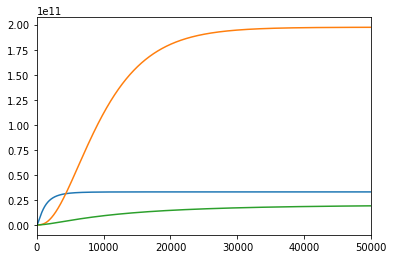

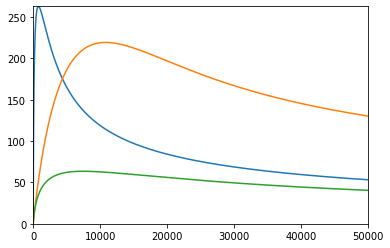

In [31]:
plt.figure()
for i in range(len(a_c)):
    plt.plot(a, masses[i])
plt.axis(xmin=0, xmax = 50e3)
plt.figure()
for i in range(len(a_c)):
    plt.plot(a, orbVels[i])
plt.axis(xmin=0, xmax = 50e3, ymin=0, ymax=max(orbVels[0]))

### Task 4

Time for you to experiment! Ideas for experimentation:

* Try changing the parameters ($\rho_c, a_c, N, d_N$) and see how it changes the distributions.
* Try adding more mass components and see how you can change the orbital velocity contributions.
* Try different distribution functions, e.g NFW